In [1]:
import sys, os
module_rootdir = '../../..'
dataset_rootdir = '../../../../'
label_rootdir = module_rootdir
sys.path.append(module_rootdir)

import config_dataset
from modules.dataset_utils.bdd_dataset_utils.remapped_bdd_utils import load_ground_truths
from modules.dataset_utils.bdd_dataset_utils.remapped_dataset_summary import obj_box_summary, aggregated_bboxes
from modules.dataset_utils.bdd_dataset_utils.dataset_summary import sort_according_to_box_criteria
from modules.plot.plot_dataanalysis import (
    plot_remapped_bbox_width_and_heights,
    plot_bbox_area_and_aspect_ratio_histogram
)

In [2]:
sel_train_labels_file = config_dataset.bdd_sel_train_labels_file
train_images_dir = config_dataset.bdd_train_images_dir

selected_labels = load_ground_truths(
    label_rootdir,
    sel_train_labels_file, 
    dataset_rootdir,
    train_images_dir, 
    verbose=True)

bbox_summary = obj_box_summary(selected_labels)
boxes_all, obj_class_all, box_area_all, box_aspect_ratio_all, image_paths_all = aggregated_bboxes(bbox_summary)
for key in list(bbox_summary.keys()):
    print(key)

Load JSON file .. please wait
annotations from 1/69863 aggregated
annotations from 2001/69863 aggregated
annotations from 4001/69863 aggregated
annotations from 6001/69863 aggregated
annotations from 8001/69863 aggregated
annotations from 10001/69863 aggregated
annotations from 12001/69863 aggregated
annotations from 14001/69863 aggregated
annotations from 16001/69863 aggregated
annotations from 18001/69863 aggregated
annotations from 20001/69863 aggregated
annotations from 22001/69863 aggregated
annotations from 24001/69863 aggregated
annotations from 26001/69863 aggregated
annotations from 28001/69863 aggregated
annotations from 30001/69863 aggregated
annotations from 32001/69863 aggregated
annotations from 34001/69863 aggregated
annotations from 36001/69863 aggregated
annotations from 38001/69863 aggregated
annotations from 40001/69863 aggregated
annotations from 42001/69863 aggregated
annotations from 44001/69863 aggregated
annotations from 46001/69863 aggregated
annotations from 4

In [3]:
boxes_sorted, \
obj_class_sorted, \
box_area_sorted, \
box_aspect_ratio_sorted, \
image_names_sorted \
    = sort_according_to_box_criteria(
            boxes_all, obj_class_all, box_area_all, \
            box_aspect_ratio_all, image_paths_all, \
            sorting_criteria='box_area', order='ascending')

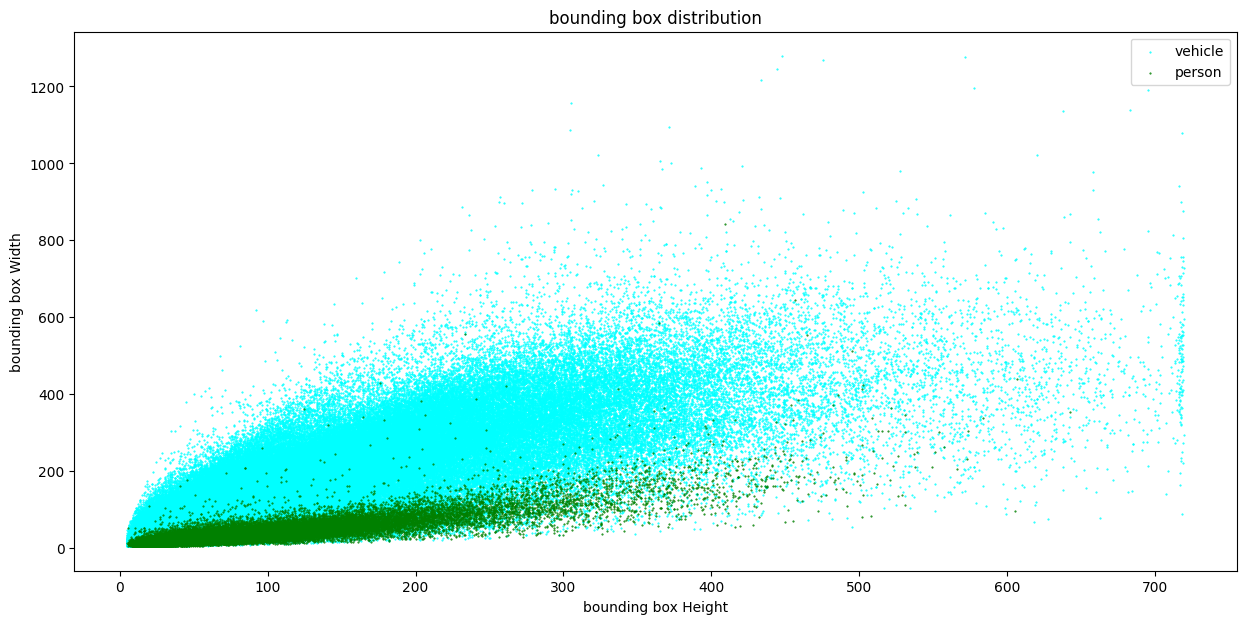

In [4]:
plot_remapped_bbox_width_and_heights("bounding box distribution", bbox_summary, figsize=(15, 7))

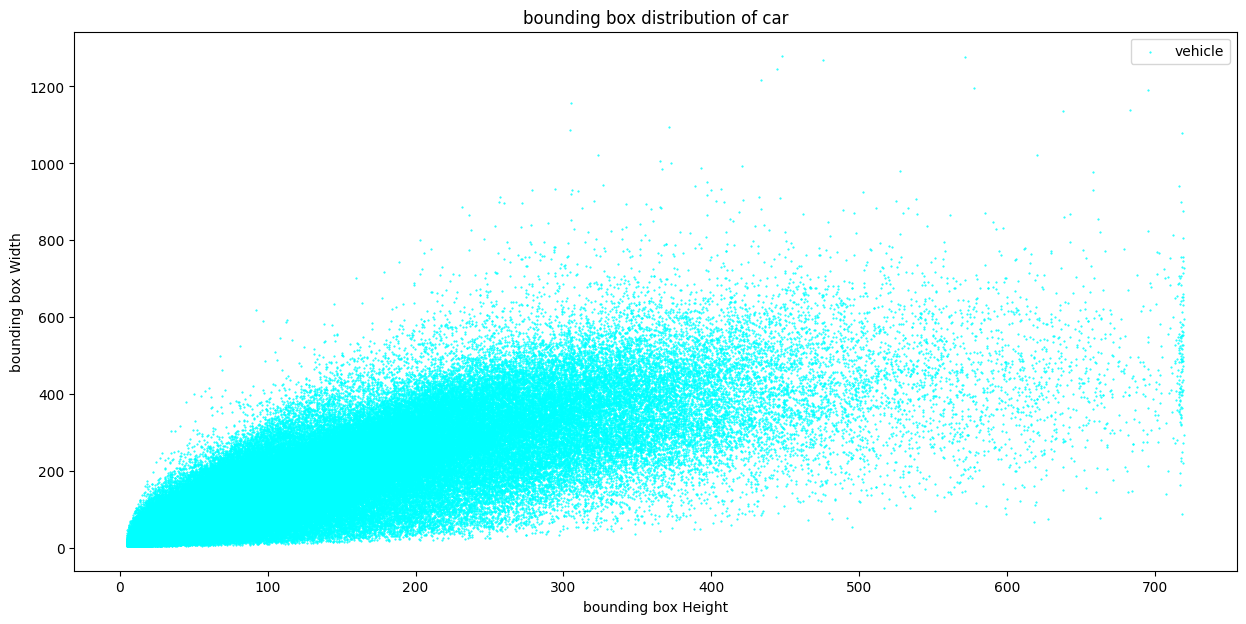

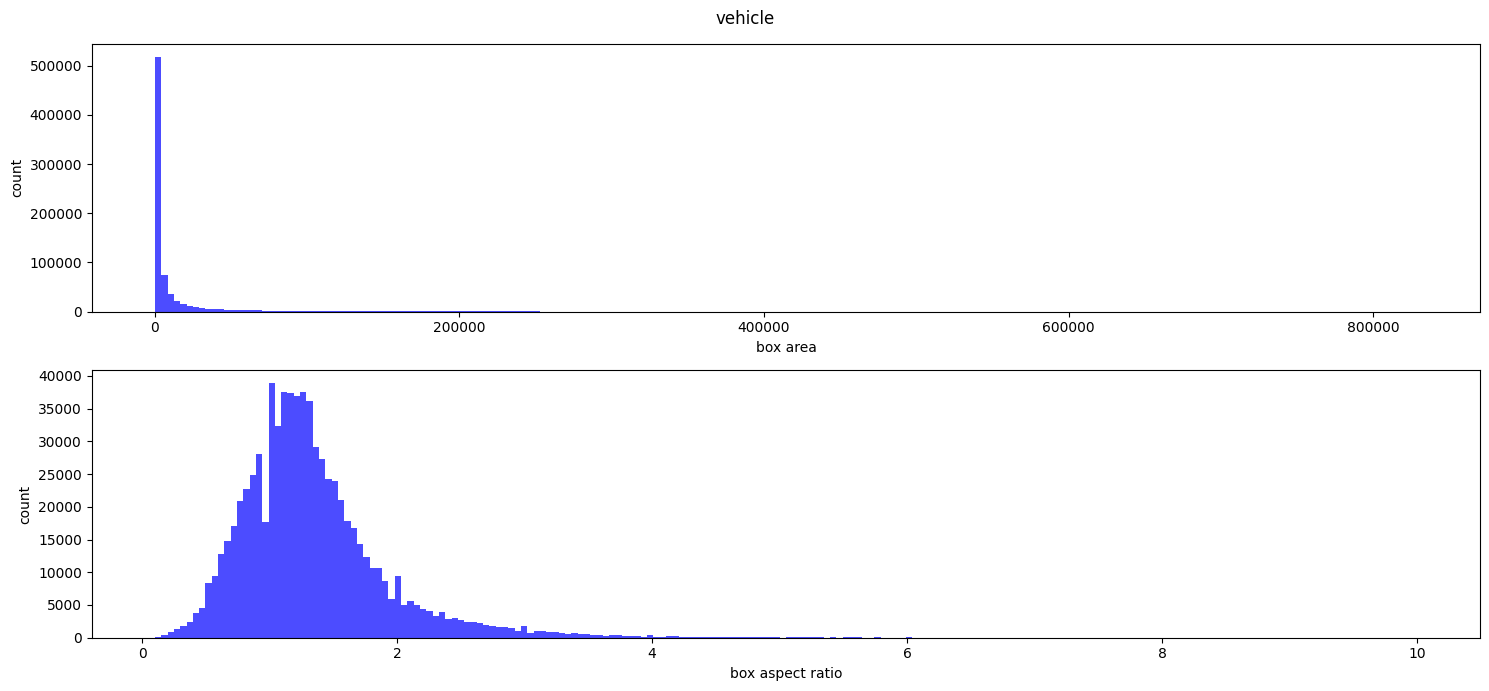

In [5]:
plot_remapped_bbox_width_and_heights(
    "bounding box distribution of car",
    bbox_summary,
    figsize=(15, 7),
    plot_veh = True,
    plot_ped = False)

plot_bbox_area_and_aspect_ratio_histogram(bbox_summary, 200, 'vehicle', (15, 7))

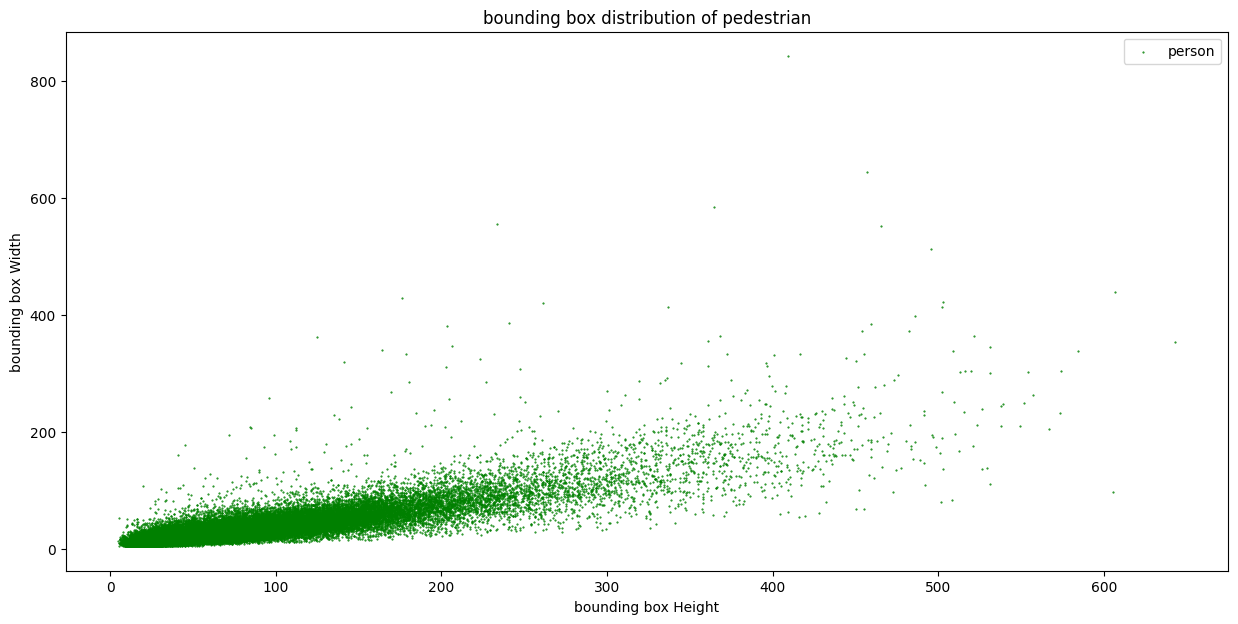

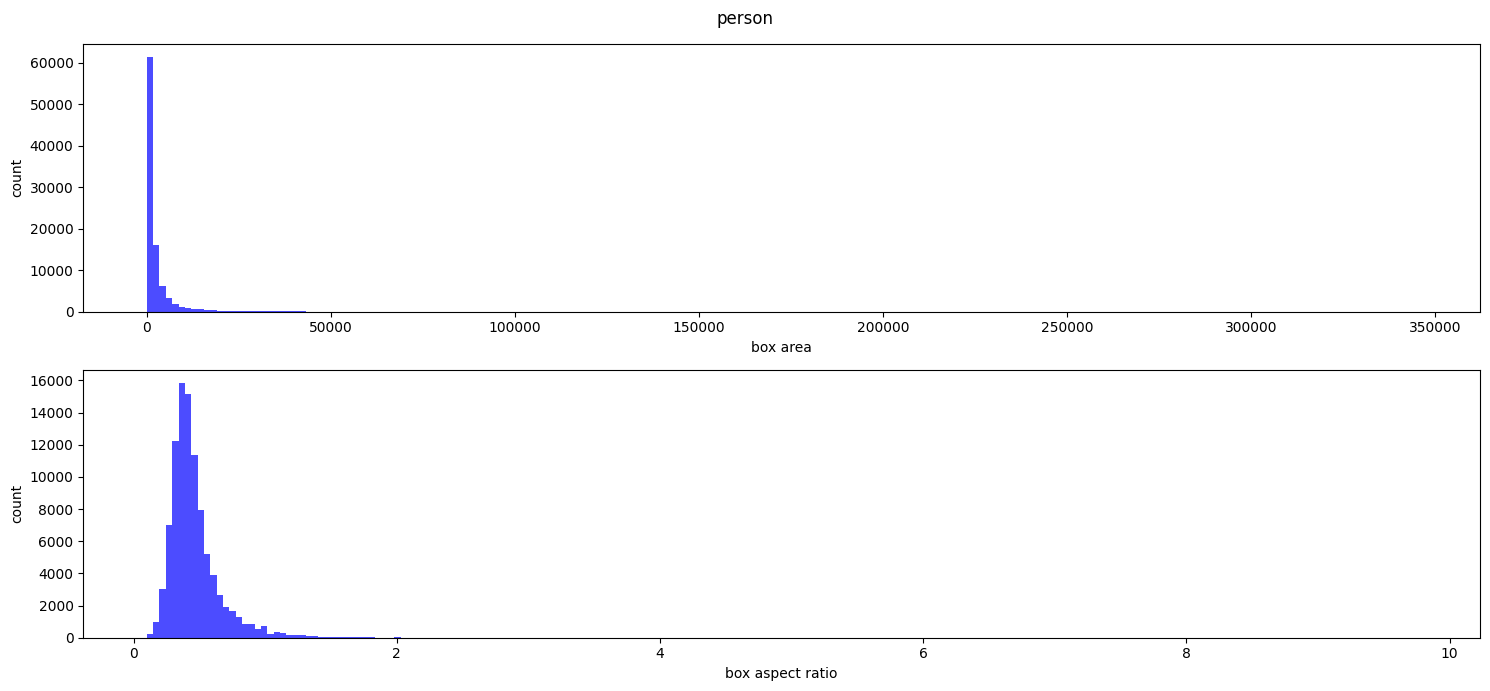

In [6]:
plot_remapped_bbox_width_and_heights(
    "bounding box distribution of pedestrian",
    bbox_summary,
    figsize=(15, 7),
    plot_veh = False,
    plot_ped = True)

plot_bbox_area_and_aspect_ratio_histogram(bbox_summary, 200, 'person', (15, 7))